## 数据加载，存储，与文件格式


### 读写
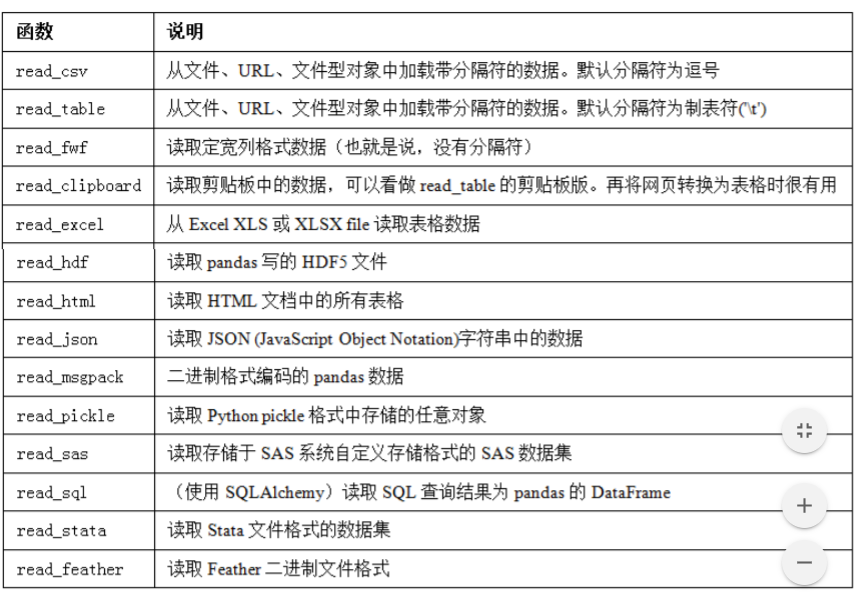

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ex1.csv')

In [3]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
pd.read_table('ex1.csv',sep = ',')

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
!type ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [7]:
!type ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
pd.read_csv('ex2.csv',header = None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
pd.read_csv('ex2.csv',names = ['a','b','c','d','message'])


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
names = ['a','b','c','d','message']

In [14]:
pd.read_csv('ex2.csv',names = names,index_col = 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [15]:
!type ex3.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16



In [16]:
parsed = pd.read_csv('ex3.csv',index_col = ['key1','key2'])

In [17]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [21]:
list(open('ex3.txt'))

['          A         B         C\n',
 ' aaa -0.264438 -1.026059 -0.619500\n',
 ' bbb  0.927272  0.302904 -0.032399\n',
 ' ccc -0.264273 -0.386314 -0.217601\n',
 ' ddd -0.871858 -0.348382  1.100491']

In [22]:
result = pd.read_table('ex3.txt',sep = '\s+')
result

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [23]:
!type ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo



In [24]:
pd.read_csv('ex4.csv',skiprows = [0,2,3])#跳过一些行

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [25]:
!type ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [26]:
result1 = pd.read_csv('ex5.csv')
result1

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [27]:
pd.isnull(result1)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [28]:
result2 = pd.read_csv('ex5.csv',na_values = ['NULL'])
result2

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


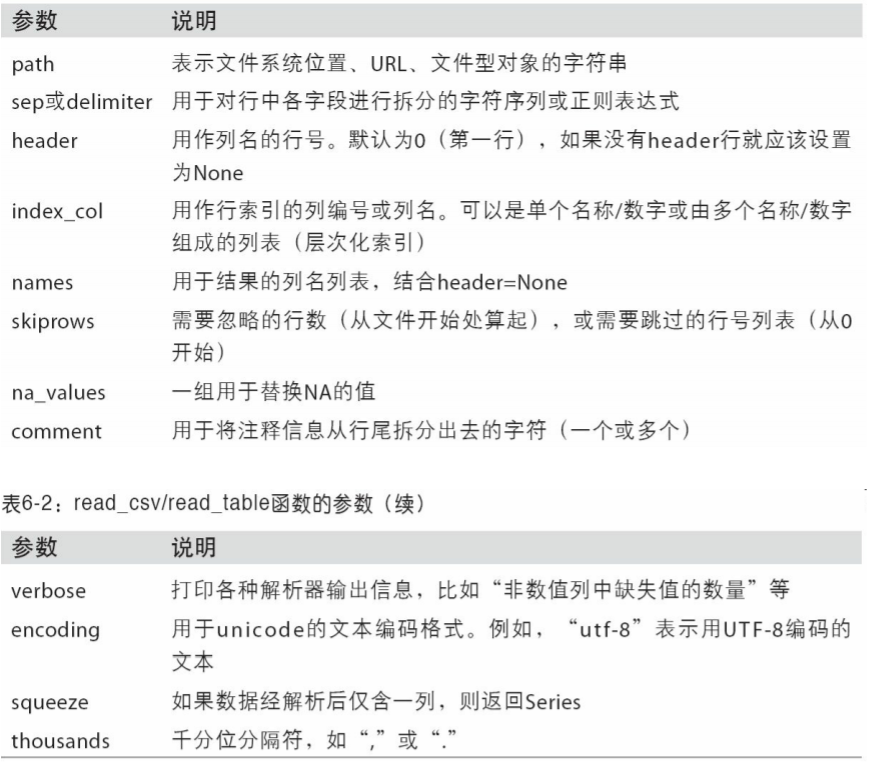

In [31]:
pd.read_csv('ex5.csv',nrows = 2)#读取前两行

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world


In [33]:
data = pd.read_csv('ex5.csv')

In [34]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [35]:
#写入
data.to_csv('out.csv')

In [36]:
!type out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [37]:
import sys

In [38]:
data.to_csv(sys.stdout,sep = '|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [39]:
data.to_csv(sys.stdout,na_rep = 'NULL')#缺失值表示为 NULL

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [41]:
#禁用 行列的标签
data.to_csv(sys.stdout,index = False,header = False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [43]:
#仅写出 部分列 并按照某顺序排序
data.to_csv(sys.stdout,index = False,columns=['c','b','a'])

c,b,a
3.0,2,1
,6,5
11.0,10,9


In [44]:
dates = pd.date_range('1/1/2000',periods=7)
ts = pd.Series(np.arange(7),index = dates)
ts.to_csv('tseries.csv')

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
!type tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6
